In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier

In [6]:
df = pd.read_table('/home/shraddha/Downloads/output20200129.txt', sep='\t',
                       names=('date_time_cst','date_time_utc','normalize15','zipcode','rdng_dtmgmt','cdt','main_adr_zip_cd_5','received_energy_kwh',
                              'delivered_energy_kwh','capacity','isDayLight'))
df = pd.DataFrame(df)
print(df.head(10))

         date_time_cst        date_time_utc  normalize15  zipcode  \
0        date_time_cst        date_time_utc  normalize15  zipcode   
1  2017-01-01 07:00:00  2017-01-01 13:00:00       0.0006    75019   
2  2017-01-01 07:00:00  2017-01-01 13:00:00       0.0107    75075   
3  2017-01-01 07:00:00  2017-01-01 13:00:00       0.0165    75093   
4  2017-01-01 07:00:00  2017-01-01 13:00:00       0.0321    76063   
5  2017-01-01 07:00:00  2017-01-01 13:00:00        0.042    78717   
6  2017-01-01 07:00:00  2017-01-01 13:00:00       0.1358    78664   
7  2017-01-01 07:15:00  2017-01-01 13:15:00       0.0006    75019   
8  2017-01-01 07:15:00  2017-01-01 13:15:00       0.0126    75075   
9  2017-01-01 07:15:00  2017-01-01 13:15:00       0.0214    76063   

           rdng_dtmgmt                  cdt  main_adr_zip_cd_5  \
0          rdng_dtmgmt                  cdt  main_adr_zip_cd_5   
1  2017-01-01 13:00:00  2017-01-01 07:00:00              75019   
2  2017-01-01 13:00:00  2017-01-01 07:00:0

In [7]:
df = df[(df['cdt'] >= '2017-03-01 00:00') & (df['cdt']<= '2017-04-30 23:45') & (df['cdt']<= '2018-03-01 00:00') & 
   (df['cdt'] <= '2018-04-30 23:45')]

df = pd.DataFrame(df)
print(df)

              date_time_cst        date_time_utc normalize15 zipcode  \
47979   2017-03-01 06:30:00  2017-03-01 12:30:00      0.0007   76182   
47980   2017-03-01 06:30:00  2017-03-01 12:30:00      0.0055   75025   
47981   2017-03-01 06:30:00  2017-03-01 12:30:00      0.0101   78660   
47982   2017-03-01 06:30:00  2017-03-01 12:30:00      0.0587   76063   
47983   2017-03-01 06:30:00  2017-03-01 12:30:00       0.062   75093   
...                     ...                  ...         ...     ...   
105713  2017-04-30 22:30:00  2017-05-01 04:30:00      0.3834   78681   
105714  2017-04-30 22:45:00  2017-05-01 04:45:00      0.3834   78681   
105715  2017-04-30 23:00:00  2017-05-01 05:00:00      0.3834   78681   
105716  2017-04-30 23:15:00  2017-05-01 05:15:00      0.3834   78681   
105717  2017-04-30 23:30:00  2017-05-01 05:30:00      0.3834   78681   

                rdng_dtmgmt                  cdt main_adr_zip_cd_5  \
47979   2017-03-01 12:30:00  2017-03-01 06:30:00             7618

In [8]:
# df = pd.DataFrame(df[['cdt', 'normalize15' , 'zipcode' ,'received_energy_kwh', 'isDayLight']])
df['cdt'] = pd.to_datetime(df['cdt'], errors='coerce')
df['date'] = [d.date() for d in df['cdt']]
df['date'] = pd.to_datetime(df['date'], errors='coerce')
df['Month'] = df['date'].dt.month
df = pd.DataFrame(df[['Month','normalize15','zipcode','received_energy_kwh']])
# df['Month'] = df['date'].dt.month
# df['month'] = df['date'].apply(lambda x : x.split('-'))
print(df[1::].head(10))

       Month normalize15 zipcode received_energy_kwh
47980      3      0.0055   75025               5.289
47981      3      0.0101   78660               0.859
47982      3      0.0587   76063               3.704
47983      3       0.062   75093               0.611
47984      3      0.0776   78717               0.000
47985      3      0.1269   76060               0.000
47986      3      0.3737   76087               0.000
47987      3      0.0007   76182               0.000
47988      3      0.0055   75025               5.607
47989      3      0.0101   78660               0.884


In [9]:
df[['Month','normalize15','zipcode' , 'received_energy_kwh']].isna().sum()

Month                  0
normalize15            0
zipcode                0
received_energy_kwh    0
dtype: int64

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 57739 entries, 47979 to 105717
Data columns (total 4 columns):
Month                  57739 non-null int64
normalize15            57739 non-null object
zipcode                57739 non-null object
received_energy_kwh    57739 non-null object
dtypes: int64(1), object(3)
memory usage: 2.2+ MB


In [11]:
df['zipcode'].value_counts(())

78681    2623
76063    2353
76087    2322
75025    2294
76060    2286
78717    2254
78664    2225
75093    2220
78660    2218
78633    2204
78728    2187
75075    2157
76126    2156
78621    2152
75023    2139
76108    2134
76182    2133
75019    2125
76087    1039
76060    1031
75025    1023
78681    1021
76063    1017
78717     996
78728     984
76182     973
75093     972
76126     959
75075     954
78621     946
76108     943
78633     943
75023     941
78660     940
75019     938
78664     937
Name: zipcode, dtype: int64

In [12]:
df = df.drop(df.index[0])
received_energy_produced = df[df['received_energy_kwh'].notnull()]
received_energy_produced

,Month,normalize15,zipcode,received_energy_kwh
47980,3,0.0055,75025,5.289
47981,3,0.0101,78660,0.859
47982,3,0.0587,76063,3.704
47983,3,0.062,75093,0.611
47984,3,0.0776,78717,0.000
...,...,...,...,...
105713,4,0.3834,78681,0
105714,4,0.3834,78681,0
105715,4,0.3834,78681,0
105716,4,0.3834,78681,0


In [13]:
df = df.drop(df.index[0])
received_energy_null = df[df['received_energy_kwh'].isnull()]
received_energy_null

,Month,normalize15,zipcode,received_energy_kwh


In [14]:
df.fillna('0').shape

(57737, 4)

In [15]:
# /df = df.set_index(df['date'])
# df.loc['2017-03-01':'2017-04-30']

# df.loc(['2018-03-01':'2018-04-30'])

In [16]:
# df = df.replace(np.nan, 0)
# sd_1 ='2017-03-01'
# ed_1 ='2017-04-30'
# sd_2 = '2018-03-01'
# ed_2 = '2018-04-30'

# df = df[(df['date'] >= sd_1) & (df['date']<= ed_1) & (df['date']<= sd_2) & (df['date'] <= ed_2)]
# print(df['date'])
# # from datetime import time  , date , datetime
# # df['cdt'] = df['cdt'].apply(lambda x : datetime.strptime(x, "%Y

In [17]:
# !pip install dateparser

In [18]:
# pip3 install -U scikit-learn
# from sklearn.model_selection import train_test_split

In [19]:
from sklearn.model_selection import train_test_split

In [20]:
from sklearn.linear_model import LinearRegression

In [21]:
# import datetime as dt
# df['date_time_cst'] = pd.to_datetime(df['date_time_cst'])
# df['date_time_cst']=df['date_time_cst'].map(dt.datetime.toordinal)
# df = df.round(df[['normalize15'  , 'receiived_energy_kwh']]  ,  5)
# df.head(10)

In [22]:
# df.dropna(how=all)

In [23]:
# x_train , x_test , y_train , y_test = train_test_split(df,df['received_energy_kwh'], test_size = 1/3)
# print('*********8')
# x_test.fillna(x_train.mean(), inplace=True)
# print('@@@@@@@@@@@@@@@@@@@@@')
# lr = LinearRegression()

# print('@@@%%%%%%%%%%%%%%')
# df  = df.reset_index(drop =True)

# lr.fit(x_train, y_train)
# print('@@@@@@')


In [24]:

# df['cdt'].astype('float')
# /print(df['cdt'])

# import datetime as dt
# df['date_time_cst'] = pd.to_datetime(df['date_time_cst'])
# df['date_time_cst']=df['date_time_cst'].map(dt.datetime.toordinal)
# lin_reg_mod.fit(X_train, y_train)
# print('%%%%%')

In [25]:
df = df.replace(np.nan, 0)
train , test = train_test_split(df,test_size = 0.07)
print(train)
print(test)

        Month normalize15 zipcode received_energy_kwh
88265       4      0.3556   78664              19.912
56838       3      0.0244   76063               1.526
100978      4      0.1356   75025               5.161
81944       4      0.4067   75023              39.964
59948       3      0.6802   75019             102.889
...       ...         ...     ...                 ...
70213       3      0.6332   75025              62.141
61941       3      0.4239   76108              43.353
49627       3      0.2387   78717               6.175
76123       4      0.0009   76108                   0
61274       3      0.0015   76126               0.000

[53695 rows x 4 columns]
        Month normalize15 zipcode received_energy_kwh
89813       4       0.527   76063              63.734
98816       4      0.6612   76060              17.112
59227       3      0.5786   75075              76.424
92632       4      0.1011   76060              10.391
87501       4      0.0121   78664               1.243
..

In [26]:
X = pd.DataFrame(np.c_[df[['Month','normalize15','zipcode']]]  , columns=['Month','normalize15','zipcode'])
y = df['received_energy_kwh']


X_train , X_test , y_train , y_test = train_test_split(X , y, test_size = 1/3  , random_state = 9)


print(X_train , X_test , y_train , y_test)



      Month normalize15 zipcode
18647     3      0.2336   78681
3750      3      0.0769   75075
747       3      0.3936   78660
57101     4      0.7061   76108
2213      3      0.6252   78633
...     ...         ...     ...
22584     3      0.0411   78681
501       3      0.6564   78660
55934     4      0.2065   76087
20828     3      0.0675   78717
57726     4      0.3834   78681

[38491 rows x 3 columns]       Month normalize15 zipcode
6737      3      0.4849   75019
12050     3      0.7862   78728
17070     3      0.2101   75023
47418     4      0.0001   75023
27463     3      0.4613   75025
...     ...         ...     ...
10199     3       0.156   78681
53452     4      0.0597   76126
18117     3      0.4399   75025
8272      3      0.2038   76126
18466     3      0.7208   76126

[19246 rows x 3 columns] 66628      16.219
51731       1.590
48728      67.836
105082    135.205
50194       0.000
           ...   
70565       0.491
48482     143.662
103915      2.807
68809       0.038


In [27]:
lin_reg_mod = LinearRegression()
print('#######')

#######


In [28]:
lin_reg_mod.fit(X_train, y_train)
print('%%%%%')

%%%%%


In [29]:
pred = lin_reg_mod.predict(X_test)
print(pred)

[42.83262974 59.65099438 18.56223618 ... 38.84412515 15.09735574
 60.73905872]


In [30]:
from sklearn.metrics import mean_squared_error, r2_score
test_set_rmse = (np.sqrt(mean_squared_error(y_test, pred)))
test_set_r2 = r2_score(y_test, pred)

In [31]:
print(test_set_rmse)
print(test_set_r2)

29.1361434839516
0.4348609333366136


In [32]:
%%bash
# pip install seaborn

TypeError: 10.274000000000001 is not a string

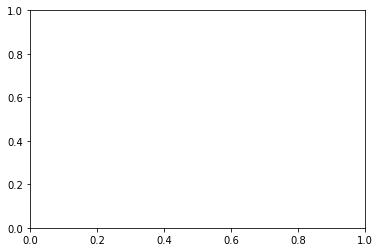

In [33]:
plt.scatter(X,y)
plt.plot(X, pred , color ='red')
plt.show()
